In [1]:
import numpy as np
import pickle as pkl
import torch
import torch.nn as nn
import os
import torch.optim as optim
from probe_experiment import ProbeExperiment
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from math import ceil

In [2]:
split = 0.8
with open('data/filtered_annotations.pkl', 'rb') as file:
    annotations = pkl.load(file)
annotations.sort(key = lambda ant : ant['f_name'])
train_ants = annotations[:int(len(annotations)*split)]
test_ants = annotations[int(len(annotations)*split):]
keywords = ['territory', 'cut', 'sente', 'shape', 'moyo',
            'ko', 'invasion', 'influence', 'wall', 'eye']

In [3]:
from go_model import GoModel
go_model = GoModel(None)
checkpoint = torch.load('model_ckpt.pth.tar', map_location=torch.device('cuda'))
state_dict = checkpoint['state_dict']
state_dict = {key[7:]:state_dict[key] for key in state_dict}
go_model.load_state_dict(state_dict)

<All keys matched successfully>

In [4]:
def cut_model(model, cut_at_layer):
    class CutModel(nn.Module):
        def __init__(self, model, cut):
            super(CutModel, self).__init__()
            self.convs = model.convs[:cut]
            self.nonlinear = model.nonlinear
            self.cut = cut
        
        def forward(self, x):
            for i in range(self.cut):
                x = self.convs[i](x)
                x = self.nonlinear(x)
            return nn.Flatten()(x)
    return CutModel(model, cut_at_layer)

models = [cut_model(go_model, i).cuda() for i in range(8)]

In [5]:
layer_n_channels = [8, 64, 64, 64, 48, 48, 32, 32]
layer_dims = [n*19*19 for n in layer_n_channels]
probe_models = [nn.Linear(dim, len(keywords)).cuda() for dim in layer_dims]

In [6]:
exp = ProbeExperiment(train_ants, test_ants, keywords)

In [7]:
preds = []

for i in range(8):
    feat_model = models[i]
    probe_model = probe_models[i]
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(probe_model.parameters(), lr=0.001)
    
    exp.run('sgd_depth%d_probe'%i, feat_model, probe_model, criterion, optimizer, batch_size=64, num_epochs=5)
    preds_, labels = exp.test_inference(feat_model, probe_model)
    preds.append(preds_)

  0%|                                                                                                                    | 1/2926 [00:00<07:12,  6.76it/s]

epoch 0 loss 0.160887
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:55,  7.04it/s]

epoch 1 loss 0.160694
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<05:51,  8.33it/s]

epoch 2 loss 0.160551
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:08,  7.93it/s]

epoch 3 loss 0.160431
new best ckpt


  0%|▏                                                                                                                    | 1/732 [00:00<01:30,  8.06it/s]

epoch 4 loss 0.160310
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<05:27,  8.93it/s]

epoch 0 loss 0.165156
new best ckpt


  0%|                                                                                                                            | 0/2926 [00:00<?, ?it/s]

epoch 1 loss 0.161674
new best ckpt


  0%|                                                                                                                            | 0/2926 [00:00<?, ?it/s]

epoch 2 loss 0.160375
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:11,  7.87it/s]

epoch 3 loss 0.159739
new best ckpt


  0%|▏                                                                                                                    | 1/732 [00:00<01:29,  8.13it/s]

epoch 4 loss 0.159401
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:19,  7.71it/s]

epoch 0 loss 0.165983
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:24,  7.61it/s]

epoch 1 loss 0.161154
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<07:07,  6.85it/s]

epoch 2 loss 0.159874
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<05:24,  9.01it/s]

epoch 3 loss 0.159352
new best ckpt


  0%|▏                                                                                                                    | 1/732 [00:00<01:42,  7.14it/s]

epoch 4 loss 0.159052
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:05,  7.99it/s]

epoch 0 loss 0.160617
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<05:59,  8.14it/s]

epoch 1 loss 0.159322
new best ckpt


  0%|                                                                                                                            | 0/2926 [00:00<?, ?it/s]

epoch 2 loss 0.158774
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<07:10,  6.80it/s]

epoch 3 loss 0.158464
new best ckpt


  0%|                                                                                                                             | 0/732 [00:00<?, ?it/s]

epoch 4 loss 0.158214
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<07:08,  6.83it/s]

epoch 0 loss 0.165062
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<05:30,  8.85it/s]

epoch 1 loss 0.161895
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:32,  7.45it/s]

epoch 2 loss 0.160485
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:11,  7.87it/s]

epoch 3 loss 0.159676
new best ckpt


  0%|▏                                                                                                                    | 1/732 [00:00<01:44,  6.99it/s]

epoch 4 loss 0.159151
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:19,  7.72it/s]

epoch 0 loss 0.174602
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:14,  7.81it/s]

epoch 1 loss 0.167146
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:05,  8.00it/s]

epoch 2 loss 0.164945
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<05:45,  8.48it/s]

epoch 3 loss 0.163748
new best ckpt


  0%|▏                                                                                                                    | 1/732 [00:00<01:33,  7.81it/s]

epoch 4 loss 0.162922
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:37,  7.35it/s]

epoch 0 loss 0.285066
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<05:59,  8.13it/s]

epoch 1 loss 0.215303
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<05:10,  9.43it/s]

epoch 2 loss 0.191639
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<07:33,  6.45it/s]

epoch 3 loss 0.180880
new best ckpt


  0%|▏                                                                                                                    | 1/732 [00:00<01:37,  7.46it/s]

epoch 4 loss 0.175133
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:02,  8.06it/s]

epoch 0 loss 0.507666
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:11,  7.87it/s]

epoch 1 loss 0.400265
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:14,  7.81it/s]

epoch 2 loss 0.334827
new best ckpt


  0%|                                                                                                                    | 1/2926 [00:00<06:34,  7.41it/s]

epoch 3 loss 0.292518
new best ckpt


  0%|▏                                                                                                                    | 1/732 [00:00<01:37,  7.46it/s]

epoch 4 loss 0.263729
new best ckpt


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 732/732 [01:22<00:00,  8.84it/s]


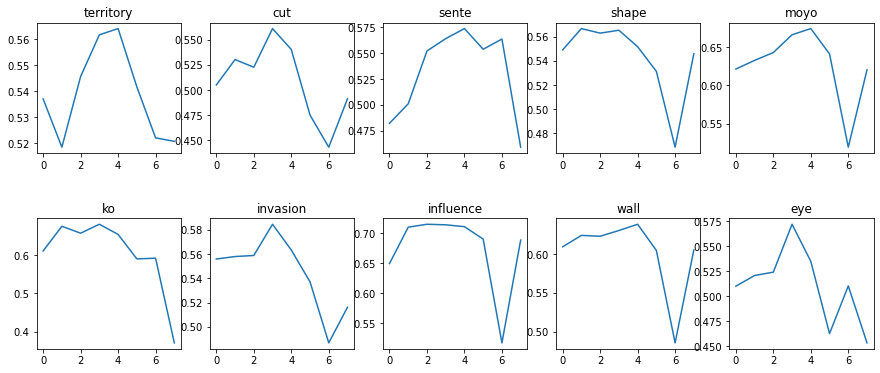

In [8]:
cols = 5
rows = ceil(len(keywords)/cols)
plt.rcParams['figure.figsize'] = (3*cols, 3*rows)
fig, axs = plt.subplots(rows, cols)
fig.subplots_adjust(hspace=0.5)

for kw in range(len(keywords)):
    aucs = []
    for depth in range(8):
        kw_preds = preds[depth][:, kw]
        kw_labels = labels[:, kw]
        auc = roc_auc_score(kw_labels, kw_preds)
        aucs.append(auc)
    axs[kw//cols][kw%cols].plot(aucs)
    axs[kw//cols][kw%cols].set_title(keywords[kw])
    

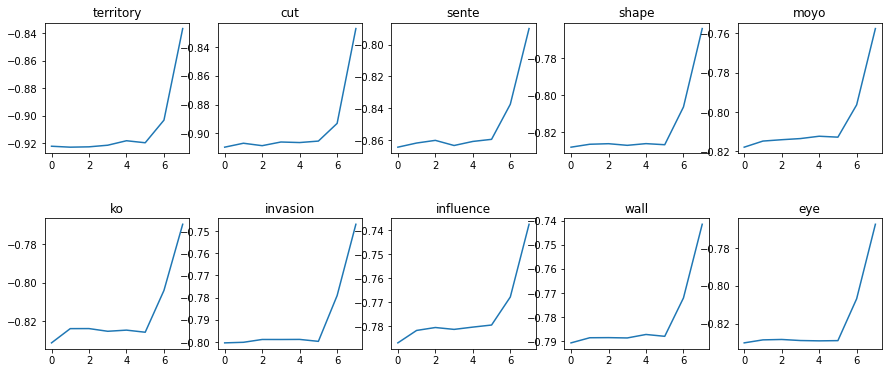

In [9]:
cols = 5
rows = ceil(len(keywords)/cols)
plt.rcParams['figure.figsize'] = (3*cols, 3*rows)
fig, axs = plt.subplots(rows, cols)
fig.subplots_adjust(hspace=0.5)

for kw in range(len(keywords)):
    losses = []
    for depth in range(8):
        kw_preds = preds[depth][:, kw]
        kw_labels = labels[:, kw]
        loss = nn.BCEWithLogitsLoss()(torch.from_numpy(kw_labels), torch.from_numpy(kw_preds))
        losses.append(-loss)
    axs[kw//cols][kw%cols].plot(losses)
    axs[kw//cols][kw%cols].set_title(keywords[kw])